<a href="https://colab.research.google.com/github/Andreagazy/PCVK-2024/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

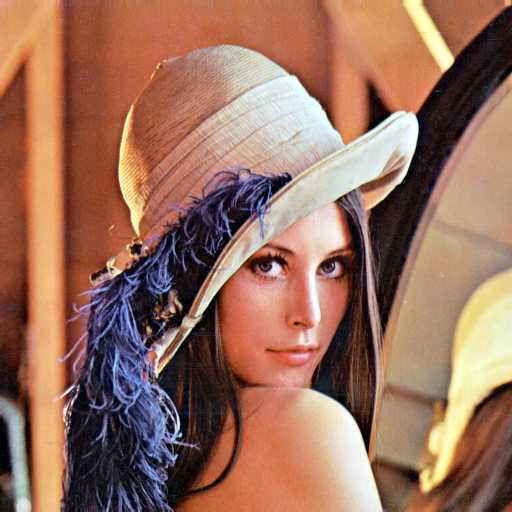

In [ ]:
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
cv2_imshow(image)

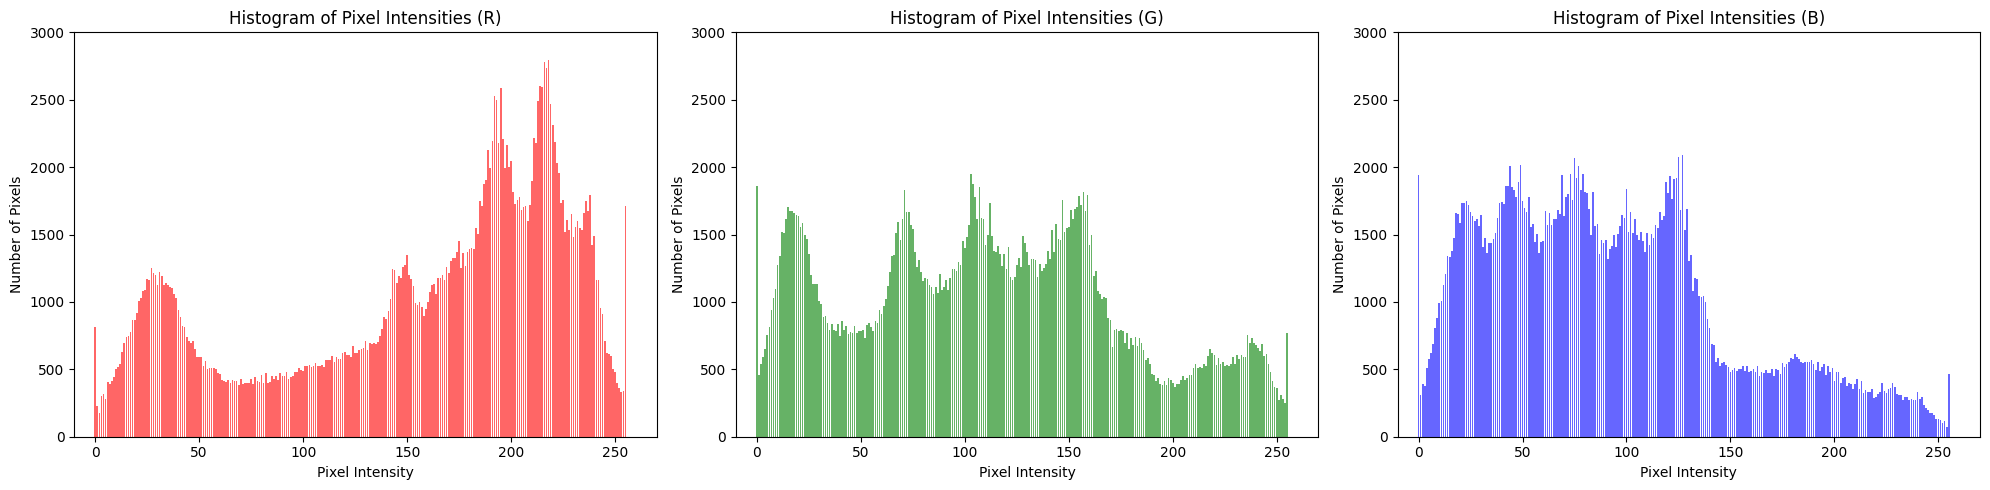

In [ ]:


# Initialize the color channels
colors = ('b', 'g', 'r')

# Create histograms as bar charts for each color channel
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Loop through the colors and plot the histograms
for i, color in enumerate(reversed(colors)):
    hist = cv.calcHist([image], [2-i], None, [256], [0, 256])
    axs[i].bar(range(256), hist.ravel(), color=color, alpha=0.6)  # Use bar chart
    axs[i].set_xlim([-10, 270])  # Corrected xlim
    axs[i].set_ylim([0, 3000])   # Corrected ylim
    axs[i].set_title(f'Histogram of Pixel Intensities ({color.upper()})')
    axs[i].set_xlabel('Pixel Intensity')
    axs[i].set_ylabel('Number of Pixels')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


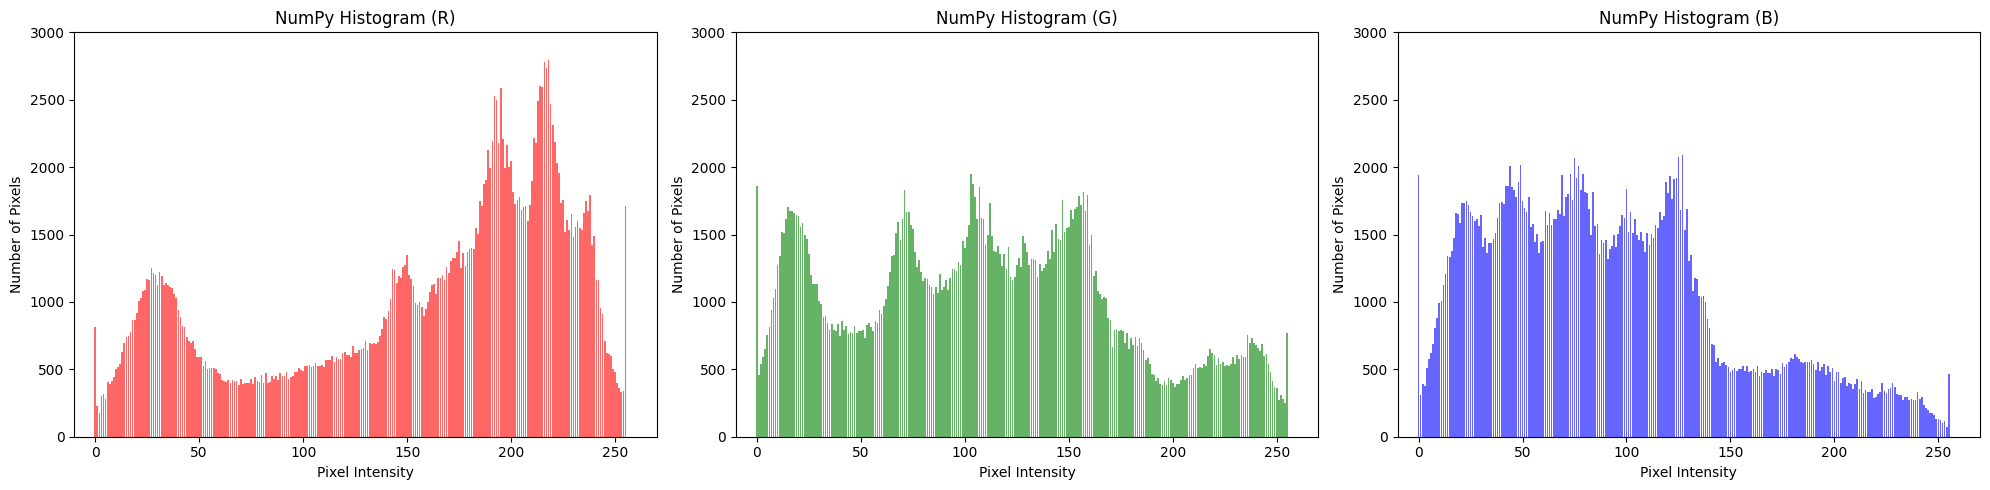

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# NumPy's histogram method
for i, color in enumerate(reversed(colors)):
    # Extract the individual channel
    channel = image[:, :, 2-i]

    # Compute the histogram using NumPy's histogram function
    hist, bins = np.histogram(channel.ravel(), bins=256, range=[0, 256])

    # Plot NumPy histogram
    axs[i].bar(range(256), hist, color=color, alpha=0.6)  # NumPy histogram
    axs[i].set_xlim([-10, 270])
    axs[i].set_ylim([0, 3000])
    axs[i].set_title(f'NumPy Histogram ({color.upper()})')
    axs[i].set_xlabel('Pixel Intensity')
    axs[i].set_ylabel('Number of Pixels')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

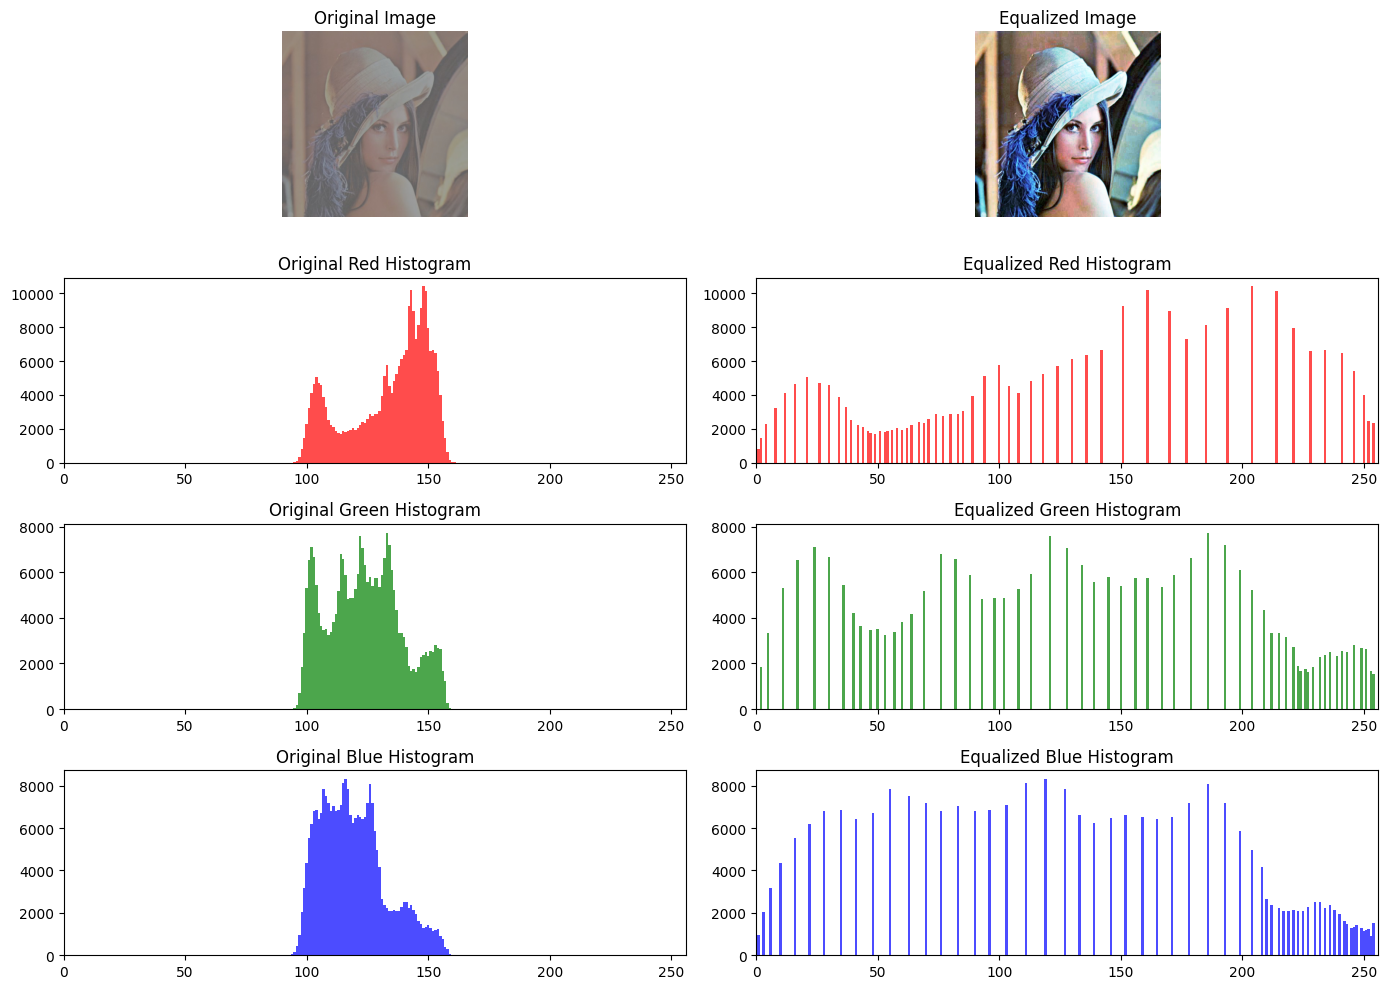

In [4]:
# Fungsi histogram equalization
def histogram_equalization(channel):
    histogram, bins = np.histogram(channel.flatten(), bins=256, range=[0,256])
    cdf = histogram.cumsum()
    cdf_normalized = cdf * (histogram.max() / cdf.max())
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_channel = cdf[channel]
    return equalized_channel

# Load gambar
image = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_np = np.array(image)

# Pisahkan saluran warna RGB
r, g, b = image_np[:, :, 0], image_np[:, :, 1], image_np[:, :, 2]

# Lakukan histogram equalization pada setiap channel
equalized_r = histogram_equalization(r)
equalized_g = histogram_equalization(g)
equalized_b = histogram_equalization(b)

# Gabungkan kembali channel yang sudah di-equalize
equalized_image = np.stack((equalized_r, equalized_g, equalized_b), axis=2)

# Plot hasil
plt.figure(figsize=(14, 10))

# Tampilkan gambar asli
plt.subplot(4, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")
plt.axis("off")

# Tampilkan gambar yang sudah di-equalize
plt.subplot(4, 2, 2)
plt.imshow(equalized_image)
plt.title("Equalized Image")
plt.axis("off")

# Fungsi untuk menampilkan histogram per channel sebagai bar
def plot_histogram(channel, title, color):
    histogram, bins = np.histogram(channel.flatten(), bins=256, range=[0, 256])
    plt.bar(bins[:-1], histogram, color=color, alpha=0.7, width=1)
    plt.title(title)
    plt.xlim([0, 256])

# Histogram gambar asli per channel
plt.subplot(4, 2, 3)
plot_histogram(r, "Original Red Histogram", 'red')

plt.subplot(4, 2, 5)
plot_histogram(g, "Original Green Histogram", 'green')

plt.subplot(4, 2, 7)
plot_histogram(b, "Original Blue Histogram", 'blue')

# Histogram gambar yang sudah di-equalize per channel
plt.subplot(4, 2, 4)
plot_histogram(equalized_r, "Equalized Red Histogram", 'red')

plt.subplot(4, 2, 6)
plot_histogram(equalized_g, "Equalized Green Histogram", 'green')

plt.subplot(4, 2, 8)
plot_histogram(equalized_b, "Equalized Blue Histogram", 'blue')

plt.tight_layout()
plt.show()

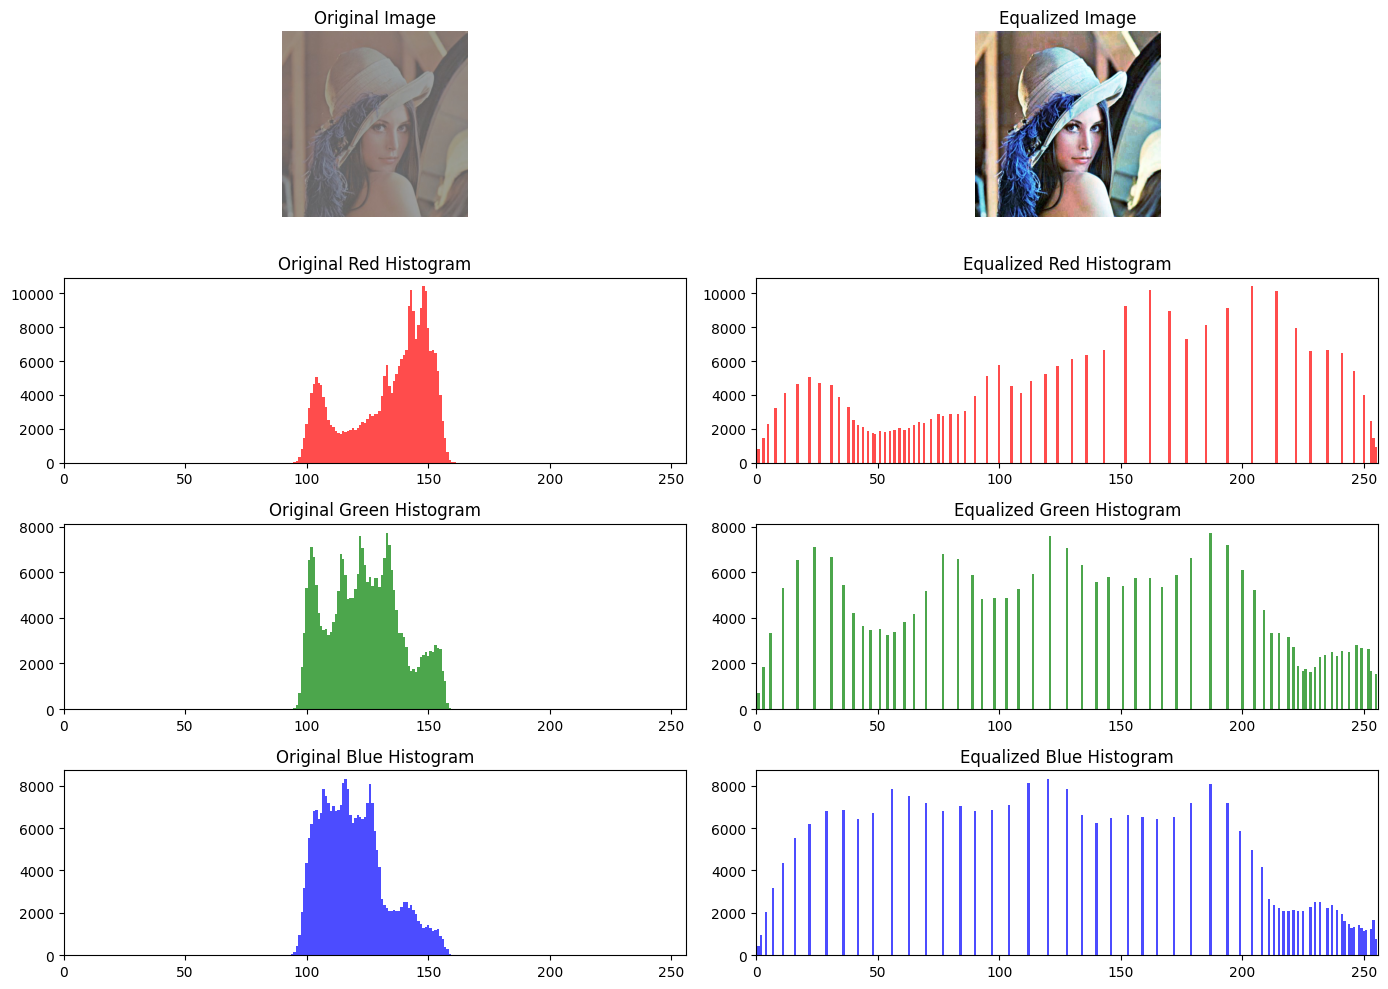

In [5]:
def plot_histogram(channel, title, color):
    histogram, bins = np.histogram(channel.flatten(), bins=256, range=[0, 256])
    plt.bar(bins[:-1], histogram, color=color, alpha=0.7, width=1)
    plt.title(title)
    plt.xlim([0, 256])

# Load gambar
image = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_np = np.array(image)

# Pisahkan saluran warna RGB
r, g, b = image_np[:, :, 0], image_np[:, :, 1], image_np[:, :, 2]

# Lakukan histogram equalization pada setiap channel menggunakan cv2.equalizeHist
equalized_r = cv.equalizeHist(r)
equalized_g = cv.equalizeHist(g)
equalized_b = cv.equalizeHist(b)

# Gabungkan kembali channel yang sudah di-equalize
equalized_image = np.stack((equalized_r, equalized_g, equalized_b), axis=2)

# Plot hasil
plt.figure(figsize=(14, 10))

# Tampilkan gambar asli
plt.subplot(4, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")
plt.axis("off")

# Tampilkan gambar yang sudah di-equalize
plt.subplot(4, 2, 2)
plt.imshow(equalized_image)
plt.title("Equalized Image")
plt.axis("off")

# Histogram gambar asli per channel
plt.subplot(4, 2, 3)
plot_histogram(r, "Original Red Histogram", 'red')

plt.subplot(4, 2, 5)
plot_histogram(g, "Original Green Histogram", 'green')

plt.subplot(4, 2, 7)
plot_histogram(b, "Original Blue Histogram", 'blue')

# Histogram gambar yang sudah di-equalize per channel
plt.subplot(4, 2, 4)
plot_histogram(equalized_r, "Equalized Red Histogram", 'red')

plt.subplot(4, 2, 6)
plot_histogram(equalized_g, "Equalized Green Histogram", 'green')

plt.subplot(4, 2, 8)
plot_histogram(equalized_b, "Equalized Blue Histogram", 'blue')

plt.tight_layout()
plt.show()

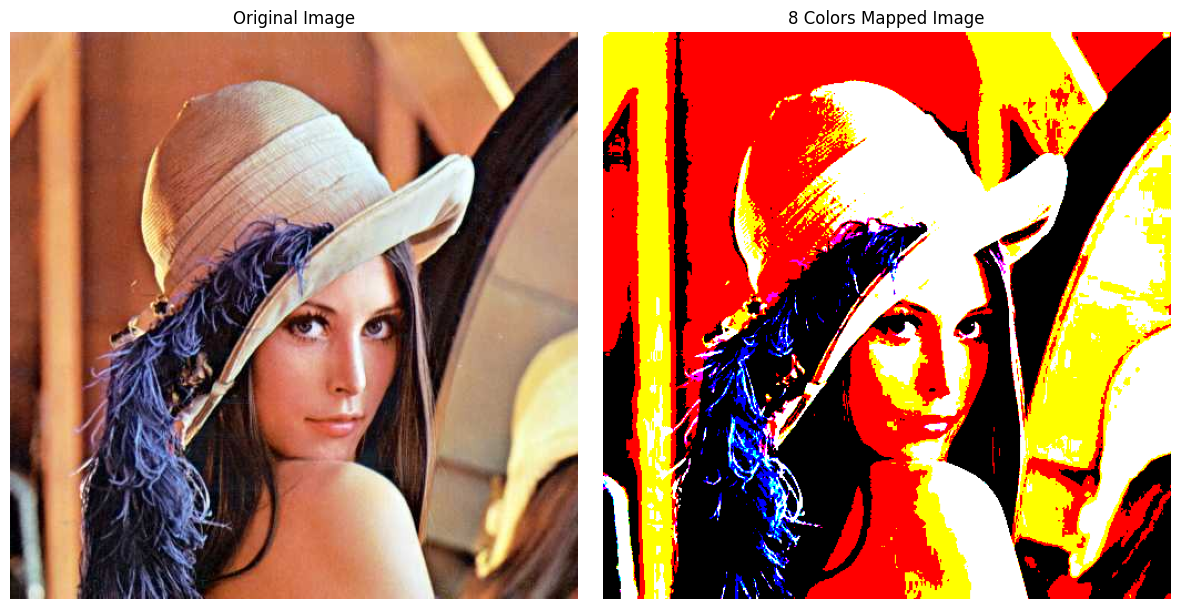

In [8]:
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Mendefinisikan 8 warna target dalam RGB
colors = {
    'black': [0, 0, 0],
    'red': [255, 0, 0],
    'green': [0, 255, 0],
    'yellow': [255, 255, 0],
    'blue': [0, 0, 255],
    'cyan': [0, 255, 255],
    'magenta': [255, 0, 255],
    'white': [255, 255, 255]
}

# Inisialisasi gambar output
output_image = np.zeros_like(image)

# Proses threshold untuk menentukan 8 warna
for color_name, color_rgb in colors.items():
    # Menentukan mask untuk setiap warna
    if color_name == 'black':
        mask = (image[:, :, 0] < 128) & (image[:, :, 1] < 128) & (image[:, :, 2] < 128)
    elif color_name == 'red':
        mask = (image[:, :, 0] >= 128) & (image[:, :, 1] < 128) & (image[:, :, 2] < 128)
    elif color_name == 'green':
        mask = (image[:, :, 0] < 128) & (image[:, :, 1] >= 128) & (image[:, :, 2] < 128)
    elif color_name == 'yellow':
        mask = (image[:, :, 0] >= 128) & (image[:, :, 1] >= 128) & (image[:, :, 2] < 128)
    elif color_name == 'blue':
        mask = (image[:, :, 0] < 128) & (image[:, :, 1] < 128) & (image[:, :, 2] >= 128)
    elif color_name == 'cyan':
        mask = (image[:, :, 0] < 128) & (image[:, :, 1] >= 128) & (image[:, :, 2] >= 128)
    elif color_name == 'magenta':
        mask = (image[:, :, 0] >= 128) & (image[:, :, 1] < 128) & (image[:, :, 2] >= 128)
    elif color_name == 'white':
        mask = (image[:, :, 0] >= 128) & (image[:, :, 1] >= 128) & (image[:, :, 2] >= 128)

    # Mengatur warna pada piksel yang sesuai dengan mask
    output_image[mask] = color_rgb

# Plot hasil
plt.figure(figsize=(12, 6))

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Tampilkan gambar hasil pemetaan 8 warna
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("8 Colors Mapped Image")
plt.axis("off")

plt.tight_layout()
plt.show()

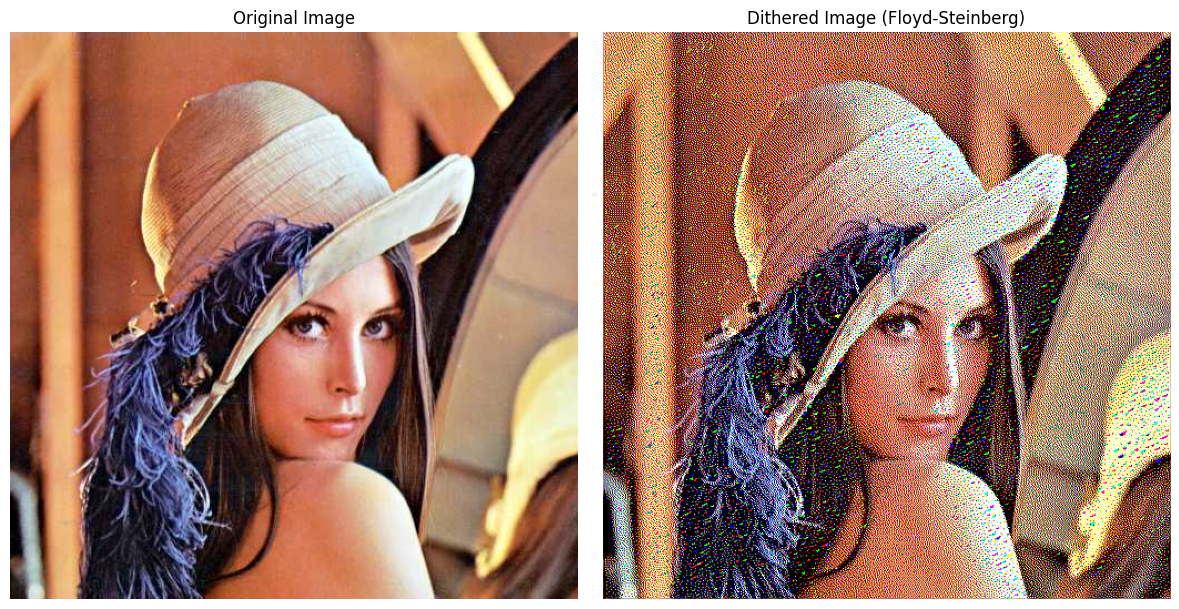

In [9]:
def threshold(value):
    return 255 if value > 128 else 0

# Baca gambar dan konversi ke RGB
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
height, width, _ = image.shape

# Pisahkan saluran warna RGB
imgRed = np.copy(image[:, :, 0])
imgGreen = np.copy(image[:, :, 1])
imgBlue = np.copy(image[:, :, 2])

# Aplikasikan algoritma dithering Floyd-Steinberg untuk setiap channel
for y in range(height - 1):
    for x in range(1, width - 1):
        # Mendapatkan nilai piksel asli
        pixelBlueOld = imgBlue[y, x]
        pixelGreenOld = imgGreen[y, x]
        pixelRedOld = imgRed[y, x]

        # Mendapatkan nilai piksel baru setelah threshold
        pixelBlueNew = threshold(pixelBlueOld)
        pixelGreenNew = threshold(pixelGreenOld)
        pixelRedNew = threshold(pixelRedOld)

        # Update piksel baru pada gambar
        imgBlue[y, x] = pixelBlueNew
        imgGreen[y, x] = pixelGreenNew
        imgRed[y, x] = pixelRedNew

        # Menghitung error dari setiap channel
        errorBlue = pixelBlueOld - pixelBlueNew
        errorGreen = pixelGreenOld - pixelGreenNew
        errorRed = pixelRedOld - pixelRedNew

        # Menyebarkan error ke piksel tetangga (R1-R4)
        imgBlue[y, x + 1] = imgBlue[y, x + 1] + errorBlue * 7 / 16
        imgBlue[y + 1, x - 1] = imgBlue[y + 1, x - 1] + errorBlue * 3 / 16
        imgBlue[y + 1, x] = imgBlue[y + 1, x] + errorBlue * 5 / 16
        imgBlue[y + 1, x + 1] = imgBlue[y + 1, x + 1] + errorBlue * 1 / 16

        imgGreen[y, x + 1] = imgGreen[y, x + 1] + errorGreen * 7 / 16
        imgGreen[y + 1, x - 1] = imgGreen[y + 1, x - 1] + errorGreen * 3 / 16
        imgGreen[y + 1, x] = imgGreen[y + 1, x] + errorGreen * 5 / 16
        imgGreen[y + 1, x + 1] = imgGreen[y + 1, x + 1] + errorGreen * 1 / 16

        imgRed[y, x + 1] = imgRed[y, x + 1] + errorRed * 7 / 16
        imgRed[y + 1, x - 1] = imgRed[y + 1, x - 1] + errorRed * 3 / 16
        imgRed[y + 1, x] = imgRed[y + 1, x] + errorRed * 5 / 16
        imgRed[y + 1, x + 1] = imgRed[y + 1, x + 1] + errorRed * 1 / 16

# Menggabungkan kembali channel warna
dithered_image = cv.merge([imgRed, imgGreen, imgBlue])

# Tampilkan hasil
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Gambar setelah dithering
plt.subplot(1, 2, 2)
plt.imshow(dithered_image)
plt.title("Dithered Image (Floyd-Steinberg)")
plt.axis("off")

plt.tight_layout()
plt.show()

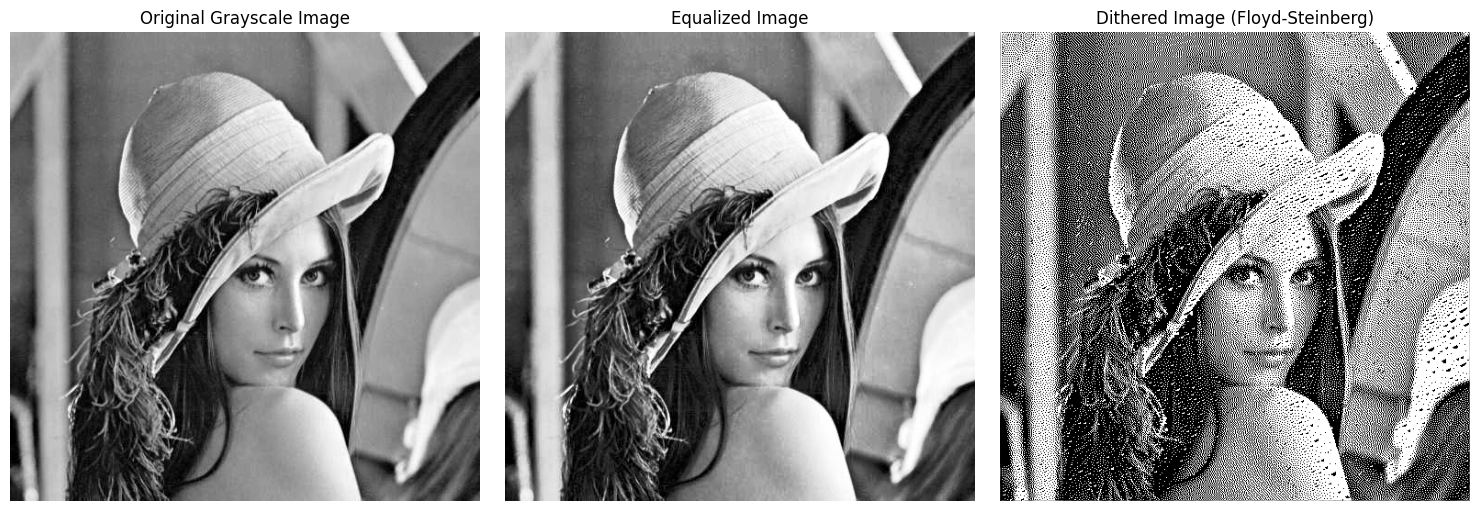

In [10]:
# Load gambar
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg', cv.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv.equalizeHist(image)

# Fungsi threshold untuk mendekatkan nilai ke 0 atau 255
def threshold(value):
    return 255 if value > 128 else 0

# Dithering Floyd-Steinberg
height, width = equalized_image.shape
dithered_image = np.copy(equalized_image)

for y in range(height - 1):
    for x in range(1, width - 1):
        # Mendapatkan nilai piksel asli
        old_pixel = dithered_image[y, x]

        # Mendapatkan nilai piksel baru setelah threshold
        new_pixel = threshold(old_pixel)

        # Update piksel baru pada gambar
        dithered_image[y, x] = new_pixel

        # Menghitung error
        error = old_pixel - new_pixel

        # Menyebarkan error ke piksel tetangga
        dithered_image[y, x + 1] += error * 7 / 16
        dithered_image[y + 1, x - 1] += error * 3 / 16
        dithered_image[y + 1, x] += error * 5 / 16
        dithered_image[y + 1, x + 1] += error * 1 / 16

# Plot hasil
plt.figure(figsize=(15, 5))

# Gambar asli (grayscale)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

# Gambar setelah histogram equalization
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

# Gambar setelah dithering Floyd-Steinberg
plt.subplot(1, 3, 3)
plt.imshow(dithered_image, cmap='gray')
plt.title("Dithered Image (Floyd-Steinberg)")
plt.axis("off")

plt.tight_layout()
plt.show()